# NAVAR applied to our data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/navar/NAVAR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/navar/NAVAR


Just installing and importing requirements.

In [2]:
!pip install -r requirements.txt
from train_NAVAR import train_NAVAR
from evaluate import calculate_AUROC, dream_file_to_causal_matrix
import pandas as pd
import argparse

Getting the preprocessed data for VAR.

In [3]:
# load the data
file_path = '../data_VAR/preprocessed.csv'
df = pd.read_csv(file_path, sep=',')
var_names = df.columns[2:]
df = df.iloc[:,2:].values # removing the date and country column
epochs = 10
maxlags = 6
df.shape

(730, 4)

Just using the same parameter choices as in Bussmann (2020), but batch size 4 as in Verstyuk (2020).

In [4]:
# should accuracy be evaluated?
evaluate = True
# should we use LSTM?
lstm = True 
lambda1 = 0.26025947107502856
batch_size = 4 # batch size for training
wd = 1.4961159190152877e-05
hidden_nodes = 10 # random (think width of layer)
learning_rate = 0.002 
hl = 1 # number of hidden layers (LSTM: number of recurrent states)
val_proportion = 0.00

And finally applying NAVAR. Validation loss does seem to be decreasing with each epoch which is good news. Oddly enough validation loss is smaller than training loss, but may have to do with sample period.

In [5]:
%%time
# start training
print(f"Training for {epochs} iterations.")
score_matrix, contributions, clf = train_NAVAR(
    df, maxlags=maxlags, hidden_nodes=hidden_nodes, dropout=0.2, epochs=epochs,
    learning_rate=learning_rate, batch_size=batch_size, lambda1=lambda1,
    val_proportion=val_proportion, weight_decay=wd, check_every=1, hidden_layers=hl, normalize=True, lstm=lstm
)
print('Done!')

Training for 10 iterations.


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


iteration 1. Loss: 0.795512855052948  Val loss: 0
iteration 2. Loss: 0.6343885064125061  Val loss: 0
iteration 3. Loss: 0.5724551677703857  Val loss: 0
iteration 4. Loss: 0.5365493297576904  Val loss: 0
iteration 5. Loss: 0.5096752047538757  Val loss: 0
iteration 6. Loss: 0.4870007634162903  Val loss: 0
iteration 7. Loss: 0.48768022656440735  Val loss: 0
iteration 8. Loss: 0.4705427587032318  Val loss: 0
iteration 9. Loss: 0.4418259263038635  Val loss: 0
iteration 10. Loss: 0.44345903396606445  Val loss: 0
Done!
CPU times: user 4.31 s, sys: 1.35 s, total: 5.66 s
Wall time: 5.68 s


There are 97 batches of (4 x 5) predictions. Here, 4 is simply the the number of variables in the system. While 5 corresponds to `maxlags`-1, that is the 5 1-step head outputs from the NAVAR.

In [6]:
df

array([[ 0.1       ,  0.01002923,  0.        , -0.4       ],
       [ 0.        , -0.07391202,  0.        ,  0.6       ],
       [ 0.        , -0.15559256,  0.        , -0.2       ],
       ...,
       [ 0.501     ,  0.10886004,  0.        , -0.6       ],
       [ 0.195     ,  0.10374644,  0.        , -0.9       ],
       [ 0.469     ,  0.09966331,  0.        , -0.2       ]])

In [11]:
clf(df)

ValueError: ignored

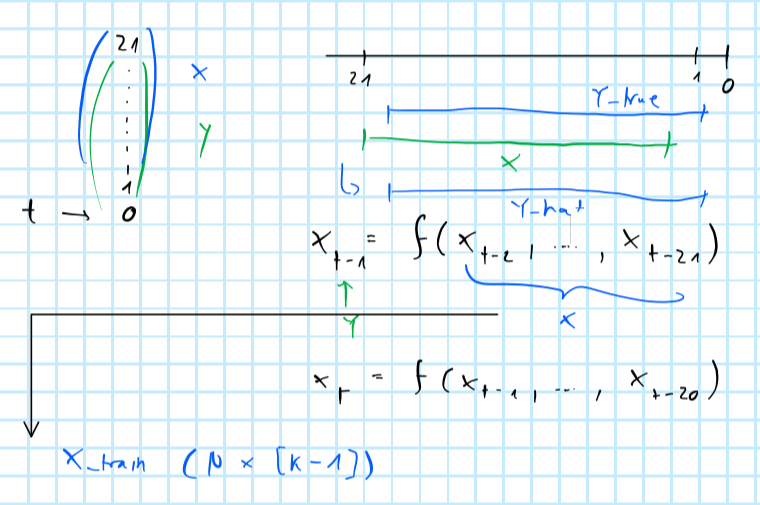

In [ ]:
y_pred.transpose([0,2,1]).shape

TypeError: ignored